In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
# Load the dataset
data = pd.read_csv("CC.csv")

# Handling Missing Values
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# Normalizing input values
features = data.drop(['CUST_ID', 'TENURE'], axis=1)
X = StandardScaler().fit_transform(features)

In [6]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


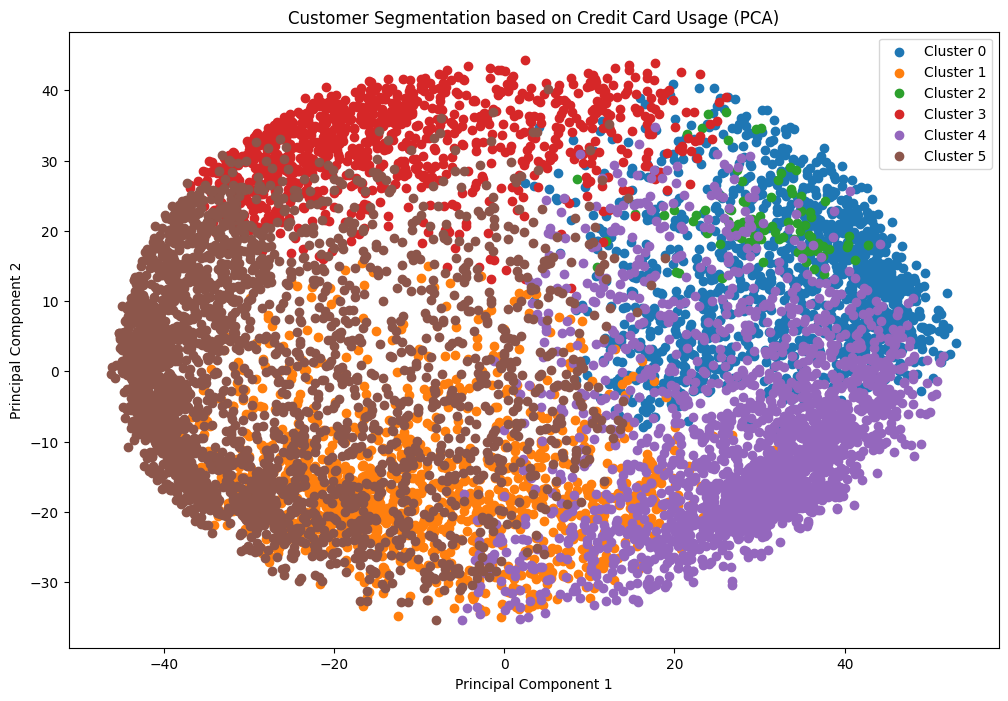

In [7]:
# Visualization using PCA
distances = 1 - cosine_similarity(X)
X_pca = PCA(2).fit_transform(distances)

# Plot the clusters
plt.figure(figsize=(12, 8))
for cluster in range(6):
    cluster_data = X_pca[data['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title("Customer Segmentation based on Credit Card Usage (PCA)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


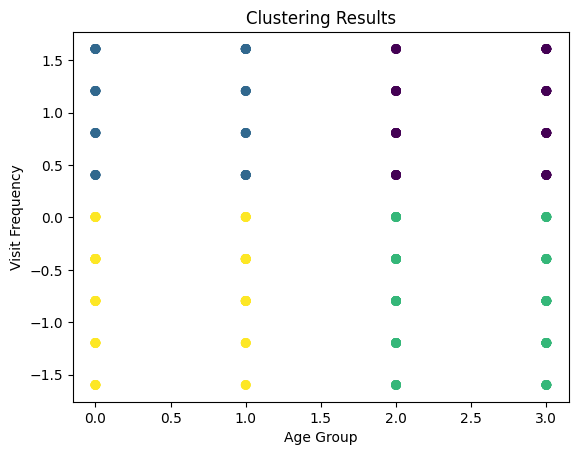

Cluster Counts:
Cluster
2    95
3    82
0    63
1    60
Name: count, dtype: int64

Cluster Means:
         Age Group  Visit Status  Visit Frequency  Other Reliance Stores
Cluster                                                                 
0         2.523810      0.539683         0.984965               0.444444
1         0.500000      0.516667         1.100739               0.550000
2         2.505263      0.515789        -0.779292               0.526316
3         0.463415      0.597561        -0.659323               0.487805


In [ ]:
# Step 5: Visualize the results using PCA
# We use PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=50)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 6: Discuss the obtained results
# You can discuss the clusters and how well they separate the customers based on their usage behavior.